In [1]:
from tensorflow.keras.preprocessing import text_dataset_from_directory
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_ds = text_dataset_from_directory('aclImdb/train')
test_ds = text_dataset_from_directory('aclImdb/test')

dfTrain = pd.DataFrame(train_ds.unbatch().as_numpy_iterator(), columns=['text', 'label'])
dfTest = pd.DataFrame(test_ds.unbatch().as_numpy_iterator(), columns=['text', 'label'])

Found 25001 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


In [3]:
pd.options.display.max_colwidth = 100
dfTrain.head()

,text,label
0,"b""The King Maker is a film about a series of real (citation needed) events that occurred during ...",0
1,"b'Truly terrible, pretentious, endless film. Director Bellocchio seems to be infatuated with the...",0
2,"b""<br /><br />If you like rap or hip-hop, watch this movie, although it's funny if you don't get...",1
3,"b'... but the keyword here is ""usually."" I have been known to adore movies EVERYONE thinks are d...",0
4,"b""I shall not waste my time writing anything much further about how every aspect of this film is...",0


In [4]:
dfTest.head()

,text,label
0,"b""What do you do with all the material that does not make the final edit of a film? You might ke...",0
1,b'Let me start by saying I don\'t recall laughing once during this comedy. From the opening scen...,0
2,"b'For once a sequel to ""The Karate Kid"" without Ralph Macchio! Hilary Swank did an excellent job...",1
3,"b""I feel as though I know these people and have known people similar to them. These days, though...",1
4,"b""A movie I've seen and enjoyed possibly more than any other movie. I first saw it as a kid and ...",1


In [5]:
xts, _ = train_test_split(dfTest, stratify=dfTest['label'], train_size=0.25)

In [6]:
vect = TfidfVectorizer(stop_words='english', max_features=65536)
XTrain = vect.fit_transform(dfTrain['text']).toarray()
XTest = vect.transform(xts['text']).toarray()

In [7]:
model = Sequential([
    Dense(128, input_shape=(65536,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=1e-3), metrics=['accuracy'])

In [8]:
history = model.fit(XTrain, dfTrain['label'], batch_size=64, validation_data=(XTest, xts['label']), epochs=50)

Epoch 1/50
391/391 [==============================] - 5s 13ms/step - loss: 0.6931 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.4936
Epoch 2/50
391/391 [==============================] - 3s 9ms/step - loss: 0.6931 - accuracy: 0.5170 - val_loss: 0.6931 - val_accuracy: 0.5179
Epoch 3/50
391/391 [==============================] - 3s 9ms/step - loss: 0.6930 - accuracy: 0.5357 - val_loss: 0.6930 - val_accuracy: 0.5352
Epoch 4/50
391/391 [==============================] - 3s 9ms/step - loss: 0.6930 - accuracy: 0.5505 - val_loss: 0.6930 - val_accuracy: 0.5458
Epoch 5/50
391/391 [==============================] - 3s 9ms/step - loss: 0.6929 - accuracy: 0.5589 - val_loss: 0.6929 - val_accuracy: 0.5566
Epoch 6/50
391/391 [==============================] - 3s 9ms/step - loss: 0.6928 - accuracy: 0.5745 - val_loss: 0.6928 - val_accuracy: 0.5683
Epoch 7/50
391/391 [==============================] - 3s 9ms/step - loss: 0.6927 - accuracy: 0.5853 - val_loss: 0.6928 - val_accuracy: 0.5781
Epoch

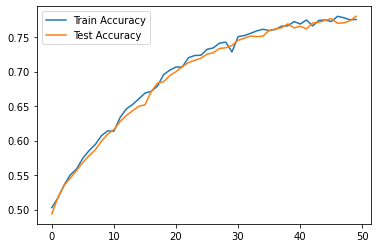

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()